# **Google playstore Data**
**Complete Exploratory Data Analysis**

## <h2 >**Author** 🧑🏻‍💻 : Yash Pokhriyal </h2> 

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/er-yash-pokhriyal)
   
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/pokhriyalyash)
   
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/yash-pokhriyal-167474359/)
   
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:er.yash.pokhriyal@gmail.com)

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following  [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## **Objective**
The primary objective of this EDA is to uncover meaningful insights and patterns within the dataset, addressing questions like:

- What are the most popular app categories?

- How does app size relate to install counts?

- What is the distribution of app ratings and prices?

- Are there correlations between reviews, installs, and ratings?

- How do paid and free apps differ in terms of user engagement?

- Which categories have the highest average prices for paid apps?

- How does app size and number of reviews relate to app category?

`Main Aim` : Checking which category will be best for making products on

## 1. Importing Libraries

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data Loading , Exploration and Cleaning

 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
#Load the Dataset
df = pd.read_csv("./dataset/googleplaystore.csv")
# df # while going through data at starting i capture the anomally at 10474 where in that dataset you will see category = 1.9 but there is correction you have to do that just from that place till end cut the data and paste just one step right to that data from rating to version now your data is corrected for that row

- Lets view the data
  

- `What I Observed ` : Some of Row and Column Data is not  visible let first make it visible here 

In [3]:
pd.set_option('display.max_columns',None) #For all columns
pd.set_option('display.max_rows',None) #For all rows
# df
#  #You can check the data too but i had comment this to make the notebook more clean

- Now all data will be visible 
- Now check the first five rows to get basic insight

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- Now lets hide future runtime warning to reduce the disturbance during analysis

In [5]:
import warnings
warnings.filterwarnings('ignore')

- Let see the exact column name of Google dataset

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- Let look the shape of dataset 

In [7]:
df.shape
#It shows it have 10841 rows and 13 columns are there

(10841, 13)

- Let explore more by looking onto its datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


---
## **Observations**
---
1. There are 10841 rows and 13 columns in dataset.
2. The columns are of different datatype .
3. The columns in the dataset are : - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`.
4. By analyzing the above data it clearly shows that some values are missing here . We will look later on this too.
5. There are even some wrong datatype columns which are of object datatype but they should be of numeric datattype - `'Size', 'Installs', 'Price'`
---


- Let see the statistical description of data 

In [9]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let change the size column first

In [10]:
#First let check the null values 
df['Size'].isnull().sum()

np.int64(0)

- No null value we are good to go
  

In [11]:
#check unique vales
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

- There are several unique values of unit in the column `Size` so we have to convert it to single unit

- Let check how many values are of unit M and unit k



In [12]:
# Let check for M (megabyte)
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum() # Total 8830 values are of M(megabyte) unit

np.int64(8830)

In [13]:
#Let check for k (killobyte)
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum() #Total 316 values are of k(kilobytes) unit


np.int64(316)

In [14]:
#Let check for the value Varies with device  too
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum() #1695 values are of Varies with device

np.int64(1695)

In [15]:
#Sum of all the data to confirm
8830+316+1695



10841

- We have `8830` values in `M` unit 
- We have `316` values in `k` unit
- We have `1695` values in `Varies with device` unit
  
> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.
  

In [16]:
#convert the size column to bytes by multiplying by 1024 for k and by 1024*1024 for M and replace Varies with device with nan value and then convert to numeric datatype
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace("k",""))*1024
        elif 'M' in size:
            return float(size.replace("M",""))*1024*1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)
    

In [17]:
#rename the column to size_in_bytes
df.rename(columns={'Size':'Size_in_bytes'},inplace=True)

In [19]:
#making new column for Size_in_mb and Size_in_k where unit is in mb(megabyte) and k(kilobyte)
df['Size_in_mb'] = df['Size_in_bytes'].apply(lambda x : x/(1024*1024))
df['Size_in_k'] = df['Size_in_bytes'].apply(lambda x: x/1024)

- Now we have convert every value in bytes , mb(megabyte) , k(kilobyte) in separate column 
- For values with `Varies with device` we intentionally change it to null value . We can add values later on basis of our needs

>Let have a look over `Installs` column now

In [20]:
#Check the unique values in the size column 
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', '1000+'], dtype=object)

In [21]:
#let have a value count 
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
1000+                1
Name: count, dtype: int64

In [ ]:
#finding how many values have + in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10840)

In [28]:
#total values in install column
df['Installs'].value_counts().sum()

np.int64(10841)

 `Problems`

- Only problem i see here is `+` sign in the value let remove them and convert it into numeric type
- The total values in the columns are `10841` and there are no null values in the column 
- However one value 0 has no `+` sign
- Lets remove the `+` and `,` from the values and convert them into numeric datatype 


In [ ]:
#remove the + sign from the install column are convert it to numeric 

df['Installs'] = df['Installs'].apply(lambda x :x.replace("+",""))

#remove the , sign from the installs column 

df['Installs']=df['Installs'].apply(lambda x : x.replace(",",""))

#convert the Installs column of object datatype to numeric datatype 

df['Installs'] = df['Installs'].apply(lambda x : int(x))

- Let check if the datatype has been change and + and , are removed .


In [33]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [35]:
df['Installs'].dtypes

dtype('int64')

- We can make a new column based on the installation values , which will be helpful for our analysis

In [ ]:
df["Installs"].max() #this will show the maximum value of the column 

1000000000

In [ ]:
# Making a new column of Install_category which will have the category of installs 

bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']

df['Installs_category'] = pd.cut(df['Installs'],bins=bins,labels=labels)



In [40]:
#Let check value count of our newly added Installs_category
df['Installs_category'].value_counts()

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

- Let have a look on `Price` column

In [41]:
#check the unique value in price column 
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [43]:
#check for any null values 
df['Price'].isnull().sum()

np.int64(0)

- No null value
  

In [45]:
#check for value count 
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

- Let check value with `$` sign

In [ ]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum() #There are 800 values with $ sign

np.int64(800)

- It is clear that only currency used is `$` sign
- The only problem is `$` sign let remove it and convert values to numeric datatype

In [53]:
df['Price'] =df['Price'].str.replace("$","")

#We can do the same thing also by lambda function
# df['Price'] = df['Price'].apply(lambda x:x.replace("$",""))

#Now let convert the value to numeric datatype

df['Price'] =df['Price'].apply(lambda x:float(x))


In [56]:
#Let check the datatype 
df["Price"].dtypes

dtype('float64')

- Let check the `minimum` , '`maximum` and `average` price of the app

In [59]:
print(f"Minimum Price of app in google playstore is {df['Price'].min()}")
print(f"Maximum Price of app in google playstore is {df['Price'].max()}")
print(f"Average Price of app in google playstore is {df['Price'].mean()}")

Minimum Price of app in google playstore is 0.0
Maximum Price of app in google playstore is 400.0
Average Price of app in google playstore is 1.0272733142699015


## 2.1 Descriptive Statistics

In [60]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_mb,Size_in_k
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


---
## **Observation**

- Now we have six columns as numeric datatype .
- We can observe their descriptive statistics and make tons of observation as per our hypothesis .
- We can see `Rating` column has the minimum value of `1` and maximum value of `5` which is the range of rating , and mean is the 4.19 which is the good rating . It shows on an average people give this rating .
- We can see that `Reviews` column has a minimum value `0` and maximum value of `7815831` or 78 million+ reviews , which is the range of the review and the mean is `444111.9` or 4 million+ reviews which is a good number of reviews .  On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- We can see `Installs` where minimum number of install of an app is `0` and maximum number of installs is `1000000000` or 1 billion installs and mean is `1546291`or 15 million+ install which shows on an average an app have 15 million+ installs . But to get more accurate details we move  further

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.

---

## 2.2  Dealing with missing values

Dealing with the missing values is the most important part of the data wrangling process , we must deal with the missing values in order to get the correct insight from the data

- Let's have a look for missing values in the dataset

In [66]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100  #this will show the percentage of missing values in each column

Size_in_bytes        15.635089
Size_in_mb           15.635089
Size_in_k            15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

- Let plot the missing value in the dataset

<Axes: >

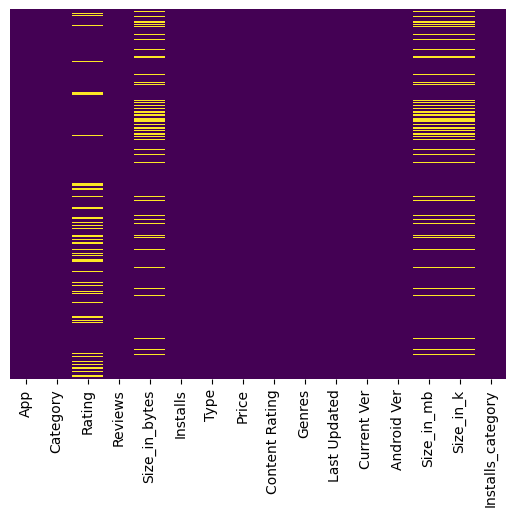

In [74]:
# Make a figure size
plt.Figure(figsize=(16,6))

#plot the null value in each column
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

- There is another way to plot the missing values by percentage using barplot

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

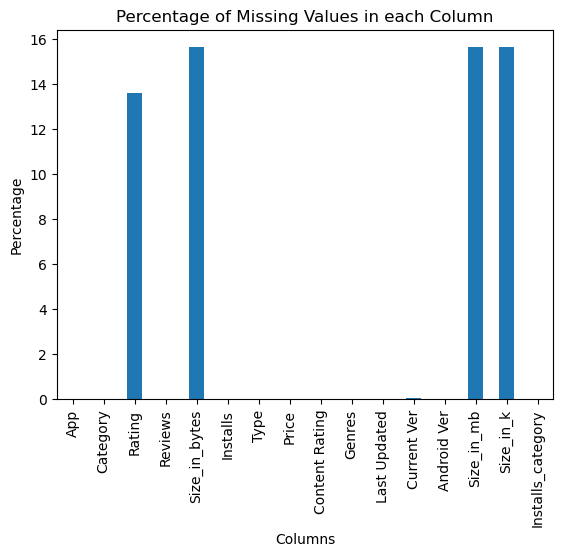

In [76]:
#make figure size
plt.Figure(figsize=(16,6))

#plot the null values by their percentage
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')

# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

- Lets plot the missing values other than `Rating` column
- We have missing percentage column other than `Rating` having less than one percent of missing values , we will plot them as follows

Text(0.5, 1.0, 'Percentage of missing value in each column except `Rating` column')

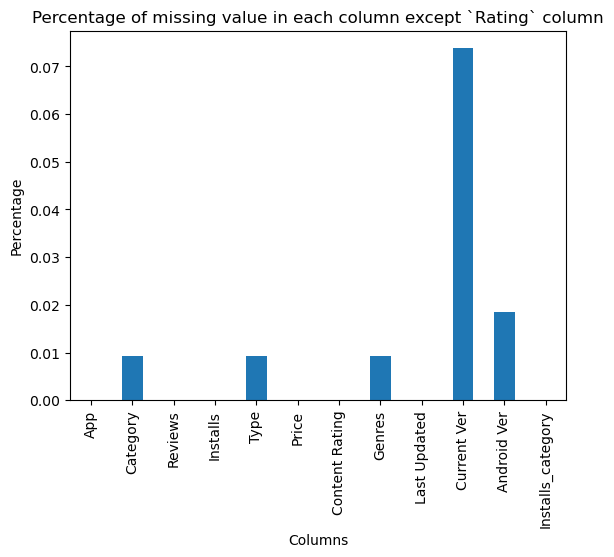

In [80]:
plt.Figure(figsize=(16,6))

missing_percentage[missing_percentage<1].plot(kind='bar')
plt.xlabel('Columns') # add the x axis label
plt.ylabel('Percentage') # add the y axis label
plt.title('Percentage of missing value in each column except `Rating` column')

---
## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

---

### **2.3. Dealing with the missing values**

- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

<Axes: >

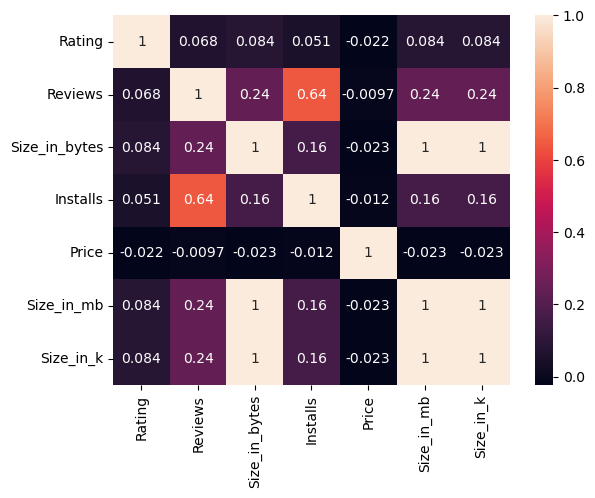

In [82]:
# Lets  run the correlation

#set figure size
plt.Figure(figsize=(16,10))
numeric_col = ['Rating','Reviews','Size_in_bytes', 'Installs', 'Price', 'Size_in_mb','Size_in_k']
sns.heatmap(df[numeric_col].corr(),annot=True) #Plot the correlation matrix

- We can also check correlation matrix using pandas

In [83]:
df[numeric_col].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_mb,Size_in_k
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000,-0.023000
Size_in_mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000,1.000000
Size_in_k,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000,1.000000


- Calculating Pearson's R using scipy

In [ ]:
# from scipy import stats

from scipy import stats

#remove the row containing nan and infinite value( important to calculate Pearson's R)
df_clean = df.dropna()

#calculate Pearson R between `Rating` and `Installs`

#by using ,_ we intentionally ignore the secodn value p-value
pearson_r,_ = stats.pearsonr(df_clean['Reviews'],df_clean['Installs'])

print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an ap with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_mb` or `Size_in_bytes` ,or `Size_in_k` which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going further lets remove the rows with missing values in the `Current ver` ,`Android Ver`, `Category`,`Type` ,`Genre` column as they are very less in number and will not affect our analaysis

In [ ]:
#Length before removing null values
print(f"Length of dataframe before removing null values : {len(df)}")

Length of dataframe before removing null values : 10841


In [88]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [89]:
#Length after removing null values
print(f"Length of dataframe after removing null values : {len(df)}")

Length of dataframe after removing null values : 10829


- We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [90]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_mb           1694
Size_in_k            1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_mb` or `Size_in_k` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [ ]:
# use groupby function to find the trend of Rating in each Installs_category
trend=df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [ ]:
# replacing the respective missing values of rating with respect to average given in each `Installs_category`
df['Rating'].fillna(df.groupby('Installs_category')['Rating'].transform('mean'), inplace=True)



In [93]:
#check the null values again
df['Rating'].isnull().sum()

np.int64(14)

In [ ]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
no                    14
Very low               0
Low                    0
Moderate               0
More than moderate     0
High                   0
Very High              0
Top Notch              0
Name: count, dtype: int64

- So its obvious value with -1 to 0 Installs certainly have  no Rating
  

Text(7, 3.5, 'Null values: 0')

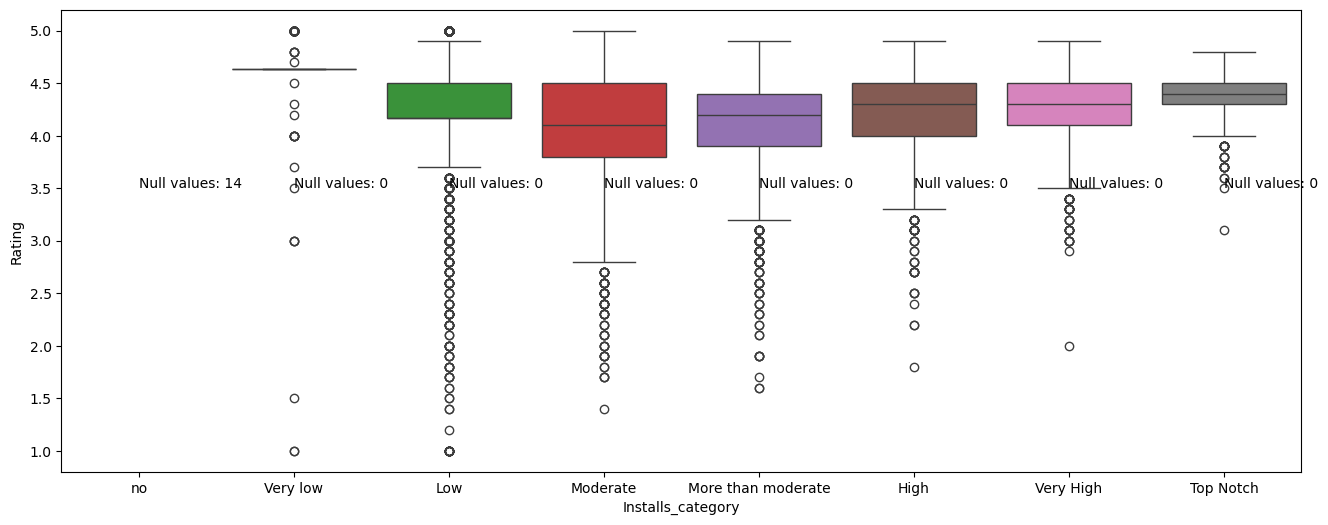

In [95]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 0')
plt.text(2, 3.5, 'Null values: 0')
plt.text(3, 3.5, 'Null values: 0')
plt.text(4, 3.5, 'Null values: 0')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

- Let check is there any similar link with `Reviews` as well

In [96]:
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()


Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are no null values in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

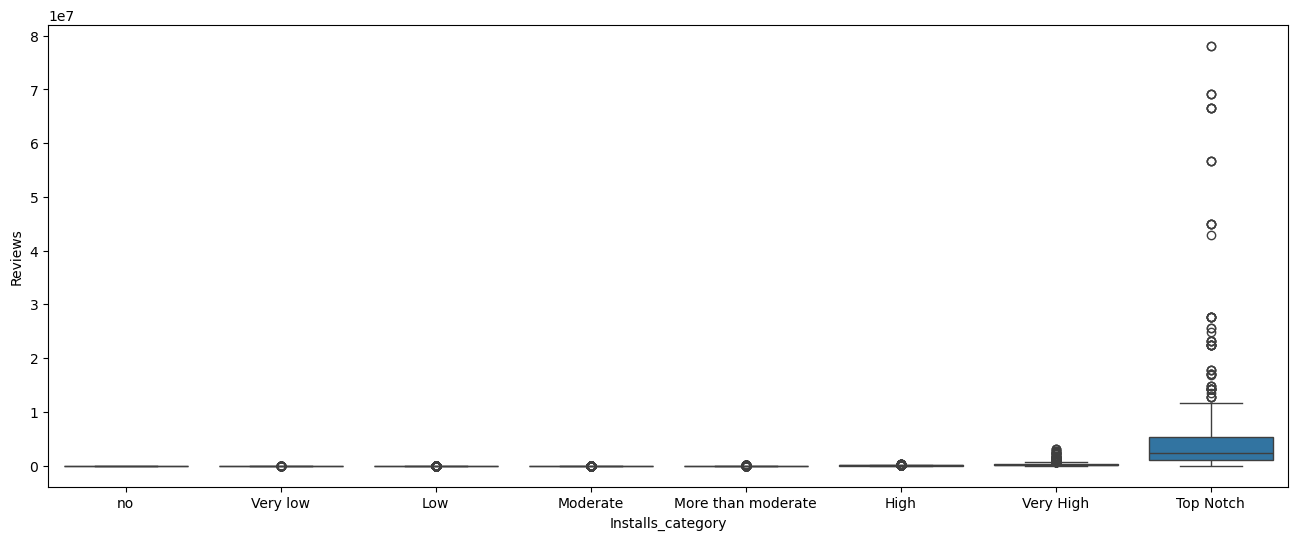

In [97]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=df) # plot the boxplot

- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

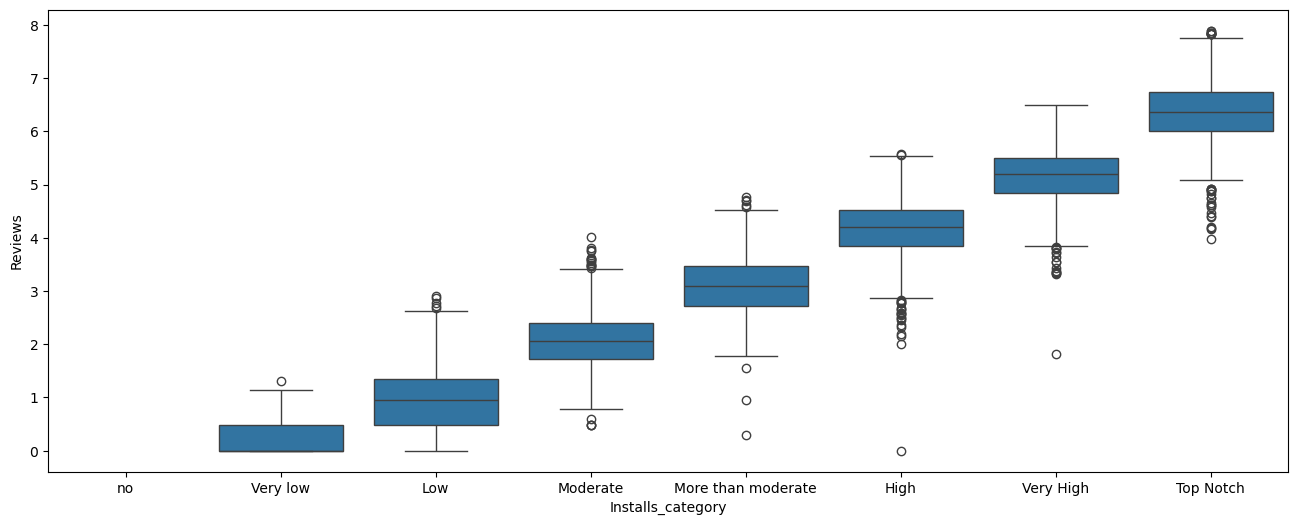

In [98]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

- Lets also draw a scatter plot of the `Rating` and `Reviews` column with `Installs` column

<Axes: xlabel='Rating', ylabel='Reviews'>

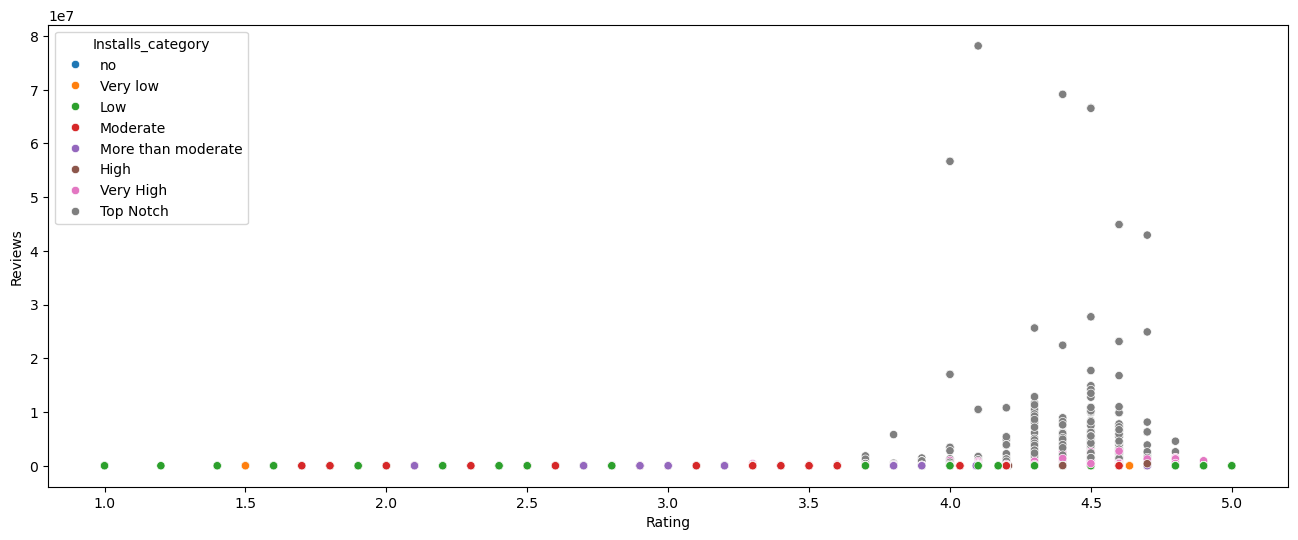

In [99]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installsm

<Axes: xlabel='Reviews', ylabel='Installs'>

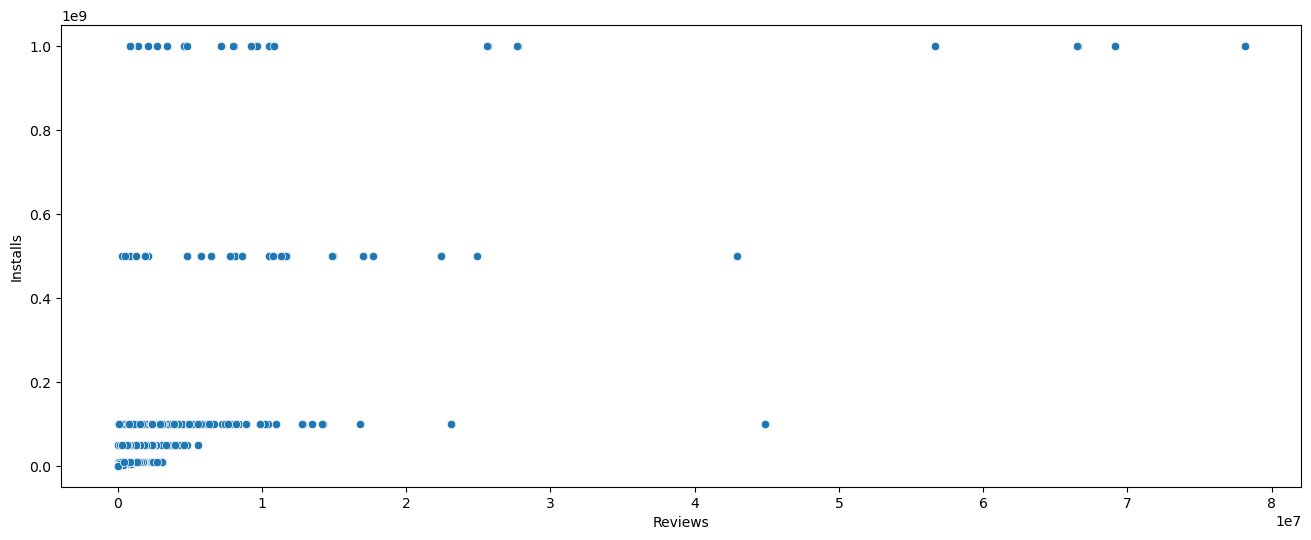

In [100]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

 - We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

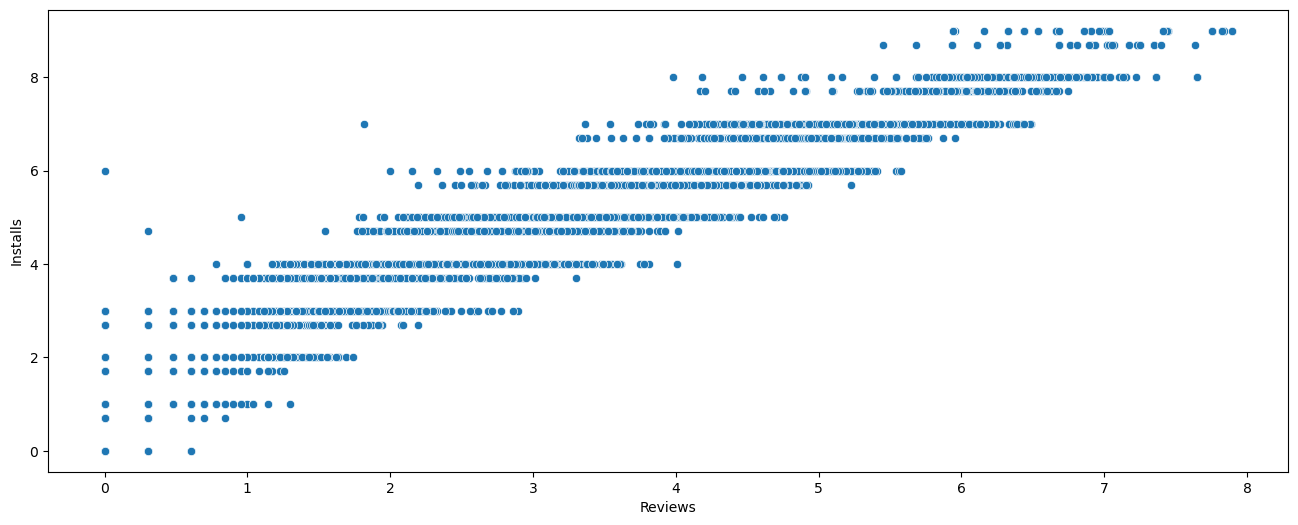

In [103]:
#plot the review and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

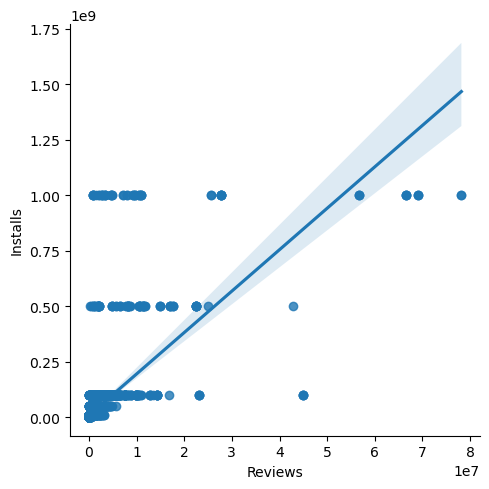

In [104]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line

 - Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

---

- Let check for duplicate as well as they can affect our data

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [105]:
# find duplicate if any
df.duplicated().sum()

np.int64(483)

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [106]:
df['App'].duplicated().sum() # check for duplicate in App column

np.int64(1181)

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [107]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10784
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_mb column are: 10373
Number of duplicates in Size_in_k column are: 10373
Number of duplicates in Installs_category column are: 10821


- This shows the best observation that only best way to find duplicate data is checking for whole dataframe 

In [110]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


In [112]:
# remove the duplicate 
df.drop_duplicates(inplace=True)

In [113]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")


Number of rows after removing duplicates: 10346


- Now we have removed the 483 duplicates from the dataset

## 3. Insights from data

### 3.1 Which category have the hightest numbers of Apps

In [114]:
#Category having maximum number of apps
df['Category'].value_counts().head(10) # top 10 categories having maximum number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Categories having maximum number of apps')

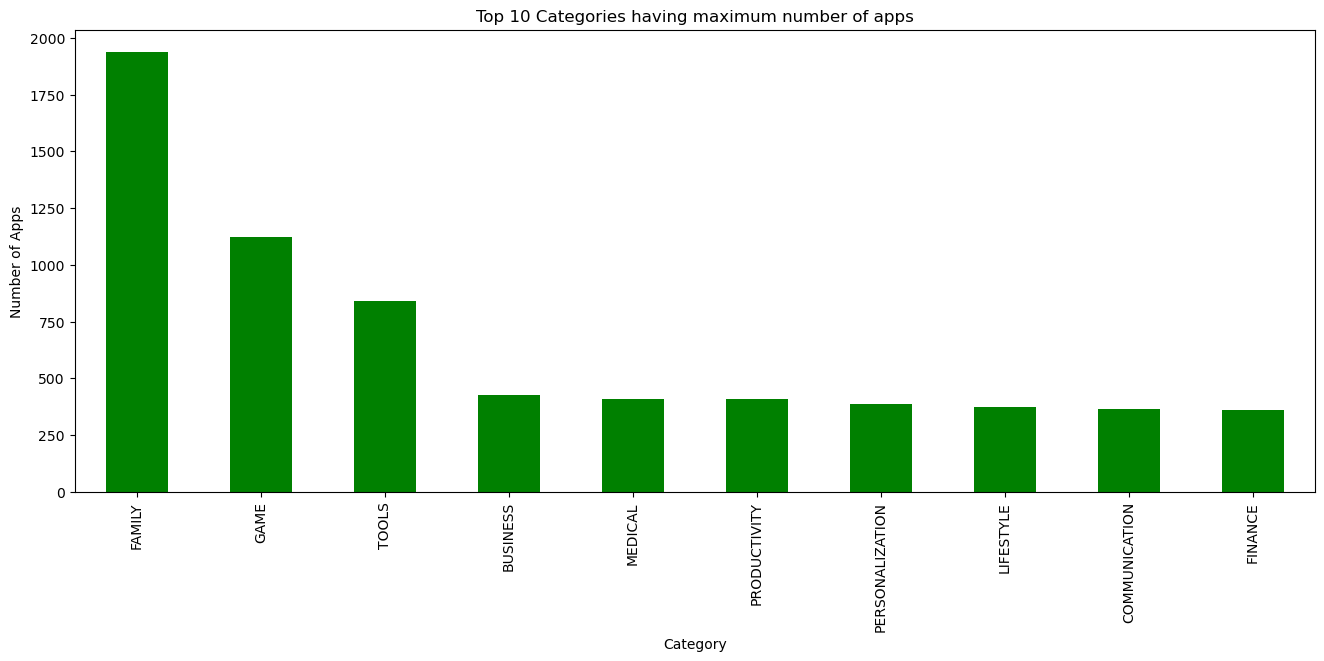

In [130]:
#plot the category having maximum number of apps (top 10)
df.Category.value_counts().head(10).plot(kind='bar', figsize=(16, 6), color='green') # plot the bar plot
plt.xlabel('Category') # add the x axis label 
plt.ylabel('Number of Apps') # add the y axis label 
plt.title('Top 10 Categories having maximum number of apps') # add the title


In [117]:
print(f"Maximum bumber of apps are from {df.Category.value_counts().idxmax()} category having {df.Category.value_counts().max()} apps")

Maximum bumber of apps are from FAMILY category having 1939 apps


### 3.2 Which category have highest number of installs

In [124]:
#Top 10 category having maximum number of installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10) # top 10 categories having maximum number of installs



Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Top 10 Categories having maximum number of installs')

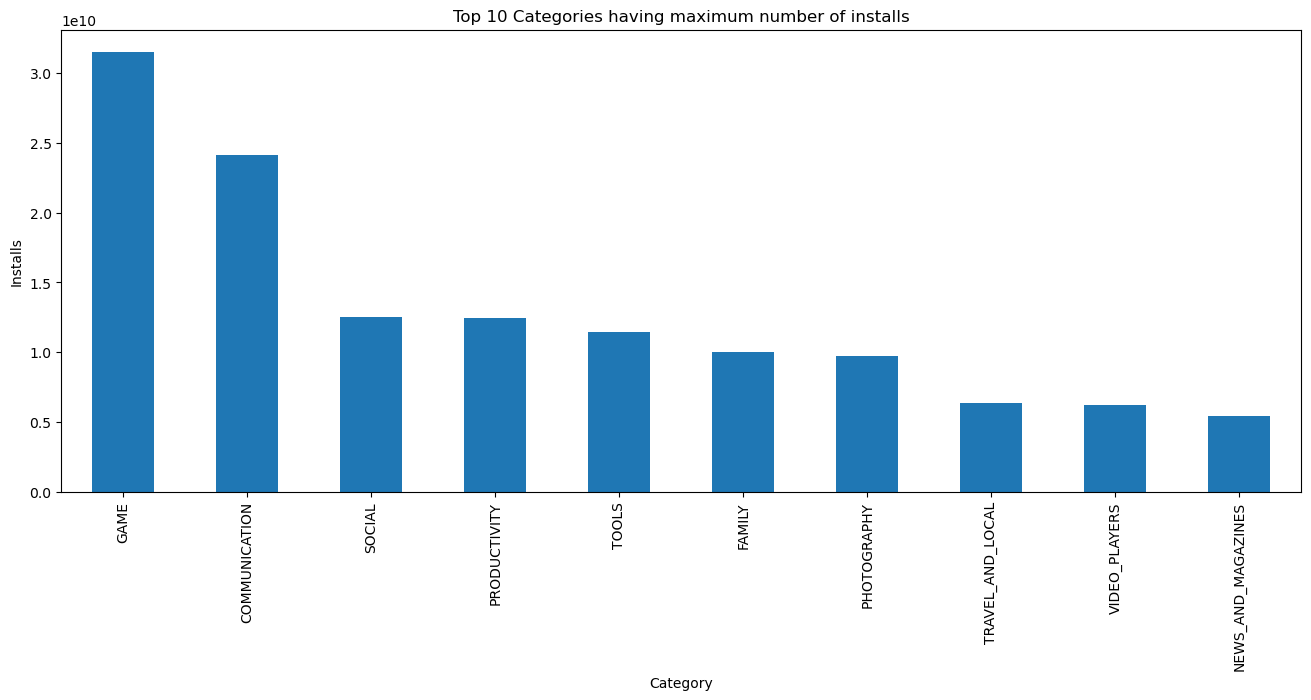

In [125]:
#plot the top 10 categories having maximum number of installs
plt.figure(figsize=(16, 6)) # make figure size
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10).plot(kind='bar') # plot the bar plot
plt.xlabel('Category') # add the x axis label   
plt.ylabel('Installs') # add the y axis label
plt.title('Top 10 Categories having maximum number of installs') # add the title

In [126]:
print(f"Maximum number of installs are from {df.groupby('Category')['Installs'].sum().idxmax()} category having {df.groupby('Category')['Installs'].sum().max()} installs")

Maximum number of installs are from GAME category having 31544024415 installs


### 3.3 Which category have the highest number of reviews

In [138]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10) # top 10 categories having maximum number of reviews

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

Text(0.5, 1.0, 'Top 10 Categories having maximum number of reviews')

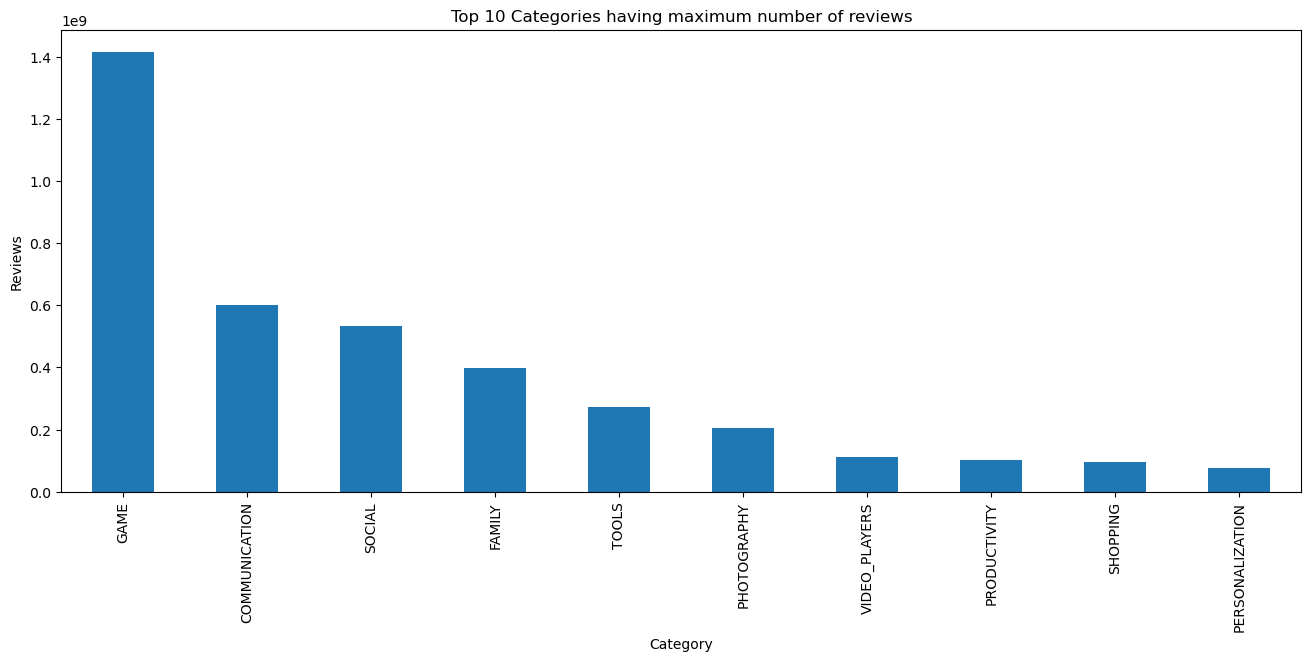

In [139]:
# plot the top 10 categories having maximum number of reviews
plt.figure(figsize=(16, 6)) # make figure size      
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10).plot(kind='bar') # plot the bar plot
plt.xlabel('Category') # add the x axis label       
plt.ylabel('Reviews') # add the y axis label
plt.title('Top 10 Categories having maximum number of reviews') # add the title

In [142]:
print(f"Maximum number of review are from {df.groupby('Category')['Reviews'].sum().idxmax()} category having {df.groupby('Category')['Reviews'].sum().max()} reviews")

Maximum number of review are from GAME category having 1415536650 reviews


### 3.4 Which category have the highest average rating ?

In [143]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.394346
EDUCATION              4.373794
ART_AND_DESIGN         4.367122
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.333325
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
SOCIAL                 4.260441
PARENTING              4.259759
SHOPPING               4.253376
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

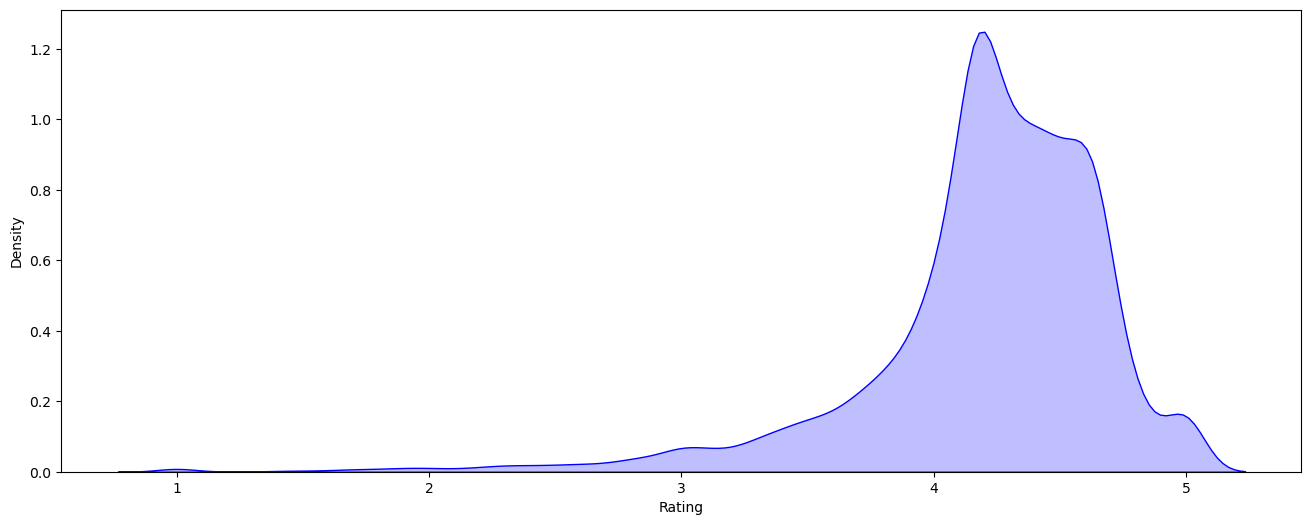

In [144]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

### 3.5 Let check paid vs free apps graph 

<Axes: xlabel='Installs', ylabel='Price'>

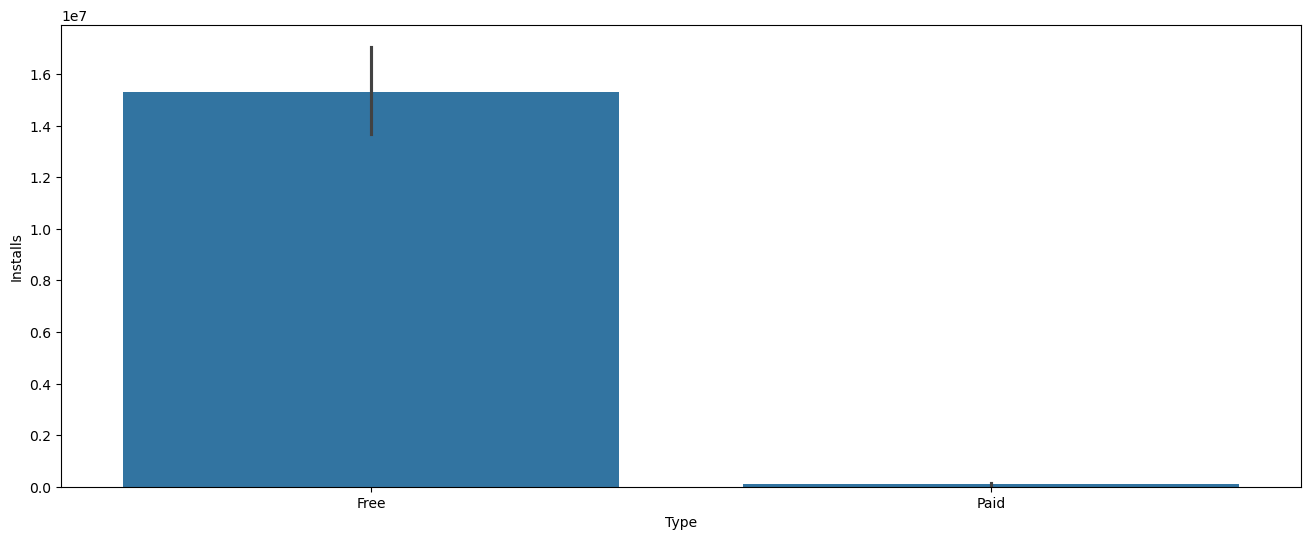

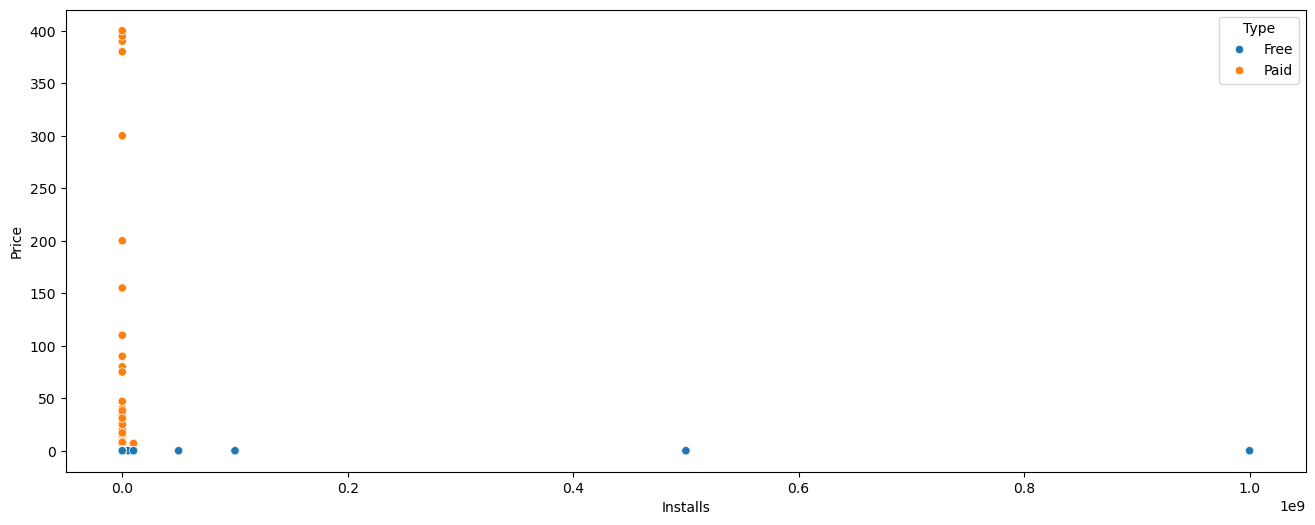

In [145]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

## 3.6 Percentage Of Paid vs Free apps Installs

Percentage of paid apps: 0.05%
Percentage of free apps: 99.95%


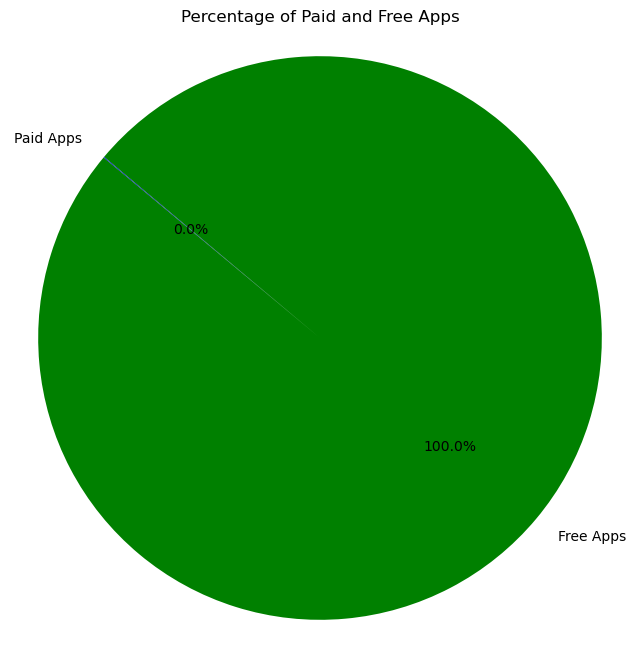

In [ ]:
# Percentage of total installs who paid for the application
paid_apps = df[df['Type'] == 'Paid']['Installs'].sum()
free_apps = df[df['Type'] == 'Free']['Installs'].sum()
total_apps = paid_apps + free_apps
percentage_paid_apps = (paid_apps / total_apps) * 100
percentage_free_apps = (free_apps / total_apps) * 100
print(f"Percentage of paid apps: {percentage_paid_apps:.2f}%")
print(f"Percentage of free apps: {percentage_free_apps:.2f}%")
# plot the pie chart for paid and free apps
plt.figure(figsize=(8, 8)) # make figure size
labels = ['Paid Apps', 'Free Apps']
sizes = [paid_apps, free_apps]
colors = ['blue', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140) # plot the pie chart
plt.axis('equal') # make the pie chart circular
plt.title('Percentage of Paid and Free Apps') # add the title
plt.show() # show the plot


## 3.7 Let check what is average price of paid app

In [ ]:

#Average price of paid apps
average_price_paid_apps = df[df['Type'] == 'Paid']['Price'].mean()
print(f"Average price of paid apps: {average_price_paid_apps:.2f}")

Average price of paid apps: 14.01


## 3.8  Price of Apps with respective to app category 

In [159]:
#Category wise average price 
df.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10) # top 10 categories having maximum average price

Category
FINANCE                8.057861
LIFESTYLE              6.329410
MEDICAL                2.501691
EVENTS                 1.718594
FAMILY                 1.247978
PRODUCTIVITY           0.616536
BOOKS_AND_REFERENCE    0.523013
BUSINESS               0.410515
WEATHER                0.395366
PERSONALIZATION        0.388549
Name: Price, dtype: float64

In [158]:
#Maximum price of paid apps with respective to category
df.groupby('Category')['Price'].max().sort_values(ascending=False).head(10)

Category
LIFESTYLE       400.00
FINANCE         399.99
FAMILY          399.99
MEDICAL         200.00
PRODUCTIVITY    154.99
EVENTS          109.99
BUSINESS         89.99
PHOTOGRAPHY      29.99
SPORTS           29.99
TOOLS            25.99
Name: Price, dtype: float64

In [163]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

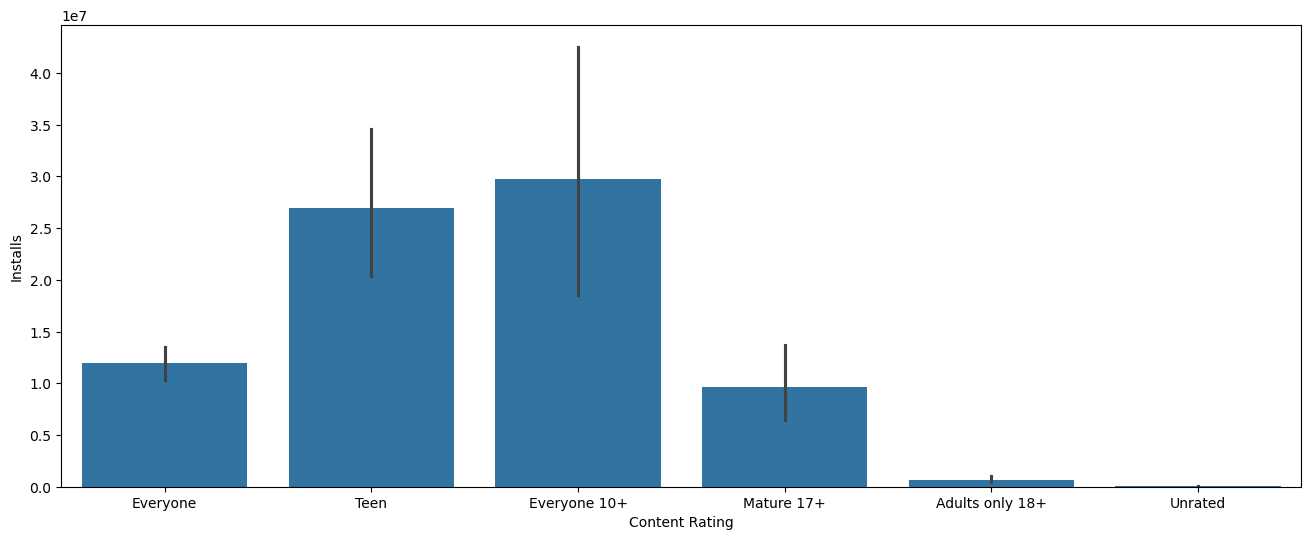

In [164]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

In [165]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

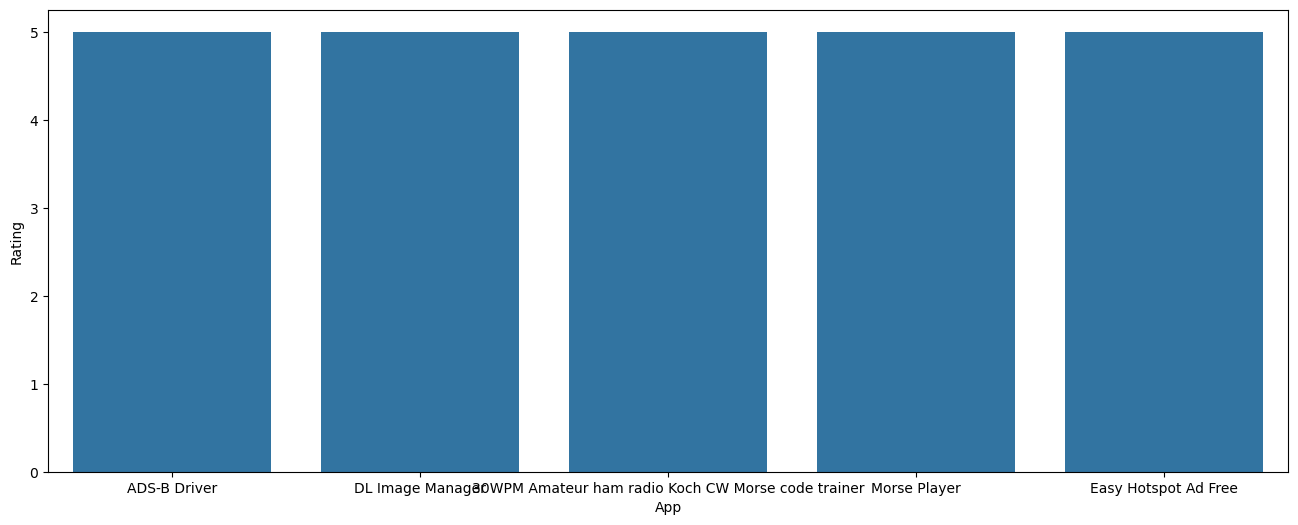

In [166]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [167]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mb,Size_in_k,Installs_category
3957,ADS-B Driver,TOOLS,5.0,2,6606028.8,100,Paid,1.99,Everyone,Tools,"May 15, 2018",1.19,4.4 and up,6.3,6451.2,Low
8526,DL Image Manager,PRODUCTIVITY,5.0,2,1782579.2,10,Paid,0.99,Everyone,Productivity,"July 29, 2018",1.0.5,4.0 and up,1.7,1740.8,Very low
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3879731.2,10,Paid,1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up,3.7,3788.8,Very low
8014,Morse Player,FAMILY,5.0,12,2516582.4,100,Paid,1.99,Everyone,Education,"January 23, 2017",2.1.1,3.0 and up,2.4,2457.6,Low
4988,Easy Hotspot Ad Free,TOOLS,5.0,2,3460300.8,10,Paid,0.99,Everyone,Tools,"July 26, 2018",1.05,4.0 and up,3.3,3379.2,Very low


<Axes: xlabel='App', ylabel='Rating'>

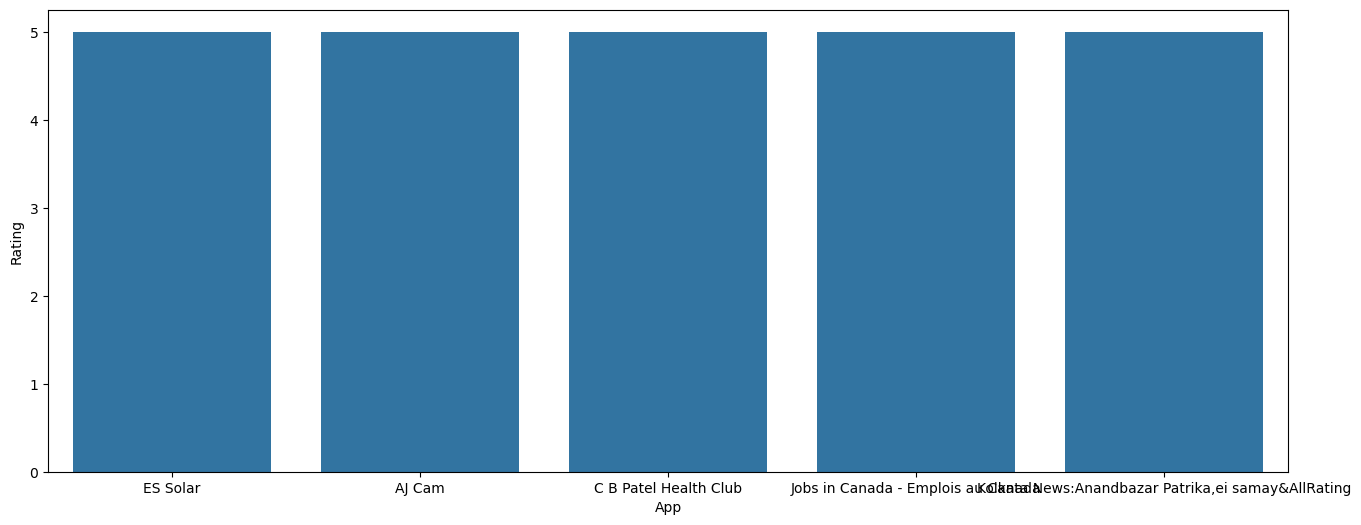

In [168]:
# plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [169]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mb,Size_in_k,Installs_category
9815,ES Solar,BUSINESS,5.0,3,4928307.2,100,Free,0.0,Everyone,Business,"May 17, 2018",1.2,4.1 and up,4.7,4812.8,Low
5230,AJ Cam,PHOTOGRAPHY,5.0,44,2936012.8,100,Free,0.0,Everyone,Photography,"January 23, 2018",1.0,4.1 and up,2.8,2867.2,Low
7131,C B Patel Health Club,HEALTH_AND_FITNESS,5.0,5,14680064.0,100,Free,0.0,Everyone,Health & Fitness,"July 2, 2018",1.0.1,4.4 and up,14.0,14336.0,Low
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2,14680064.0,1000,Free,0.0,Teen,Business,"August 5, 2018",1.1,4.2 and up,14.0,14336.0,Low
9444,"Kolkata News:Anandbazar Patrika,ei samay&AllRa...",NEWS_AND_MAGAZINES,5.0,10,5242880.0,100,Free,0.0,Everyone,News & Magazines,"July 14, 2018",1.0,4.0.3 and up,5.0,5120.0,Low


<Axes: xlabel='App', ylabel='Reviews'>

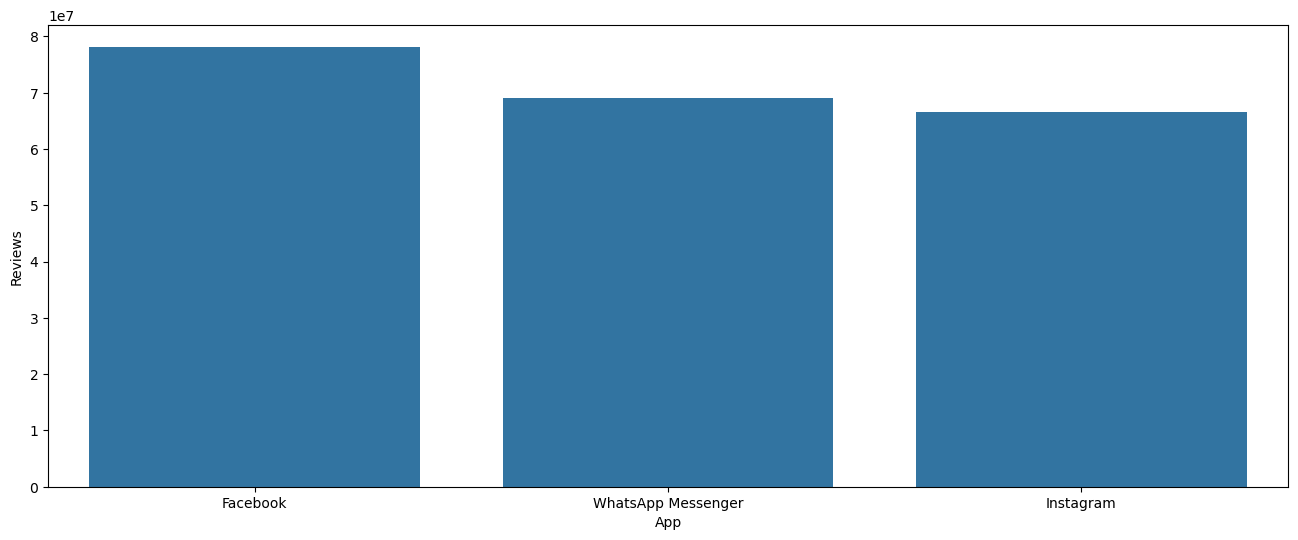

In [170]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

In [171]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mb,Size_in_k,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch


<Axes: xlabel='App', ylabel='Reviews'>

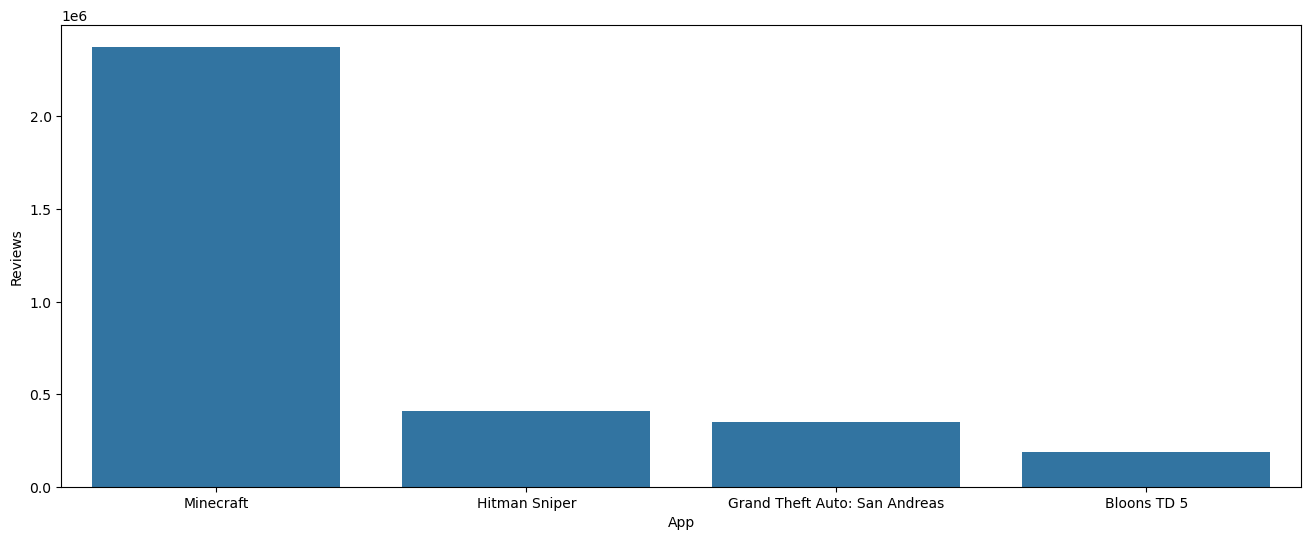

In [172]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

--- 
## **Conclusion**

>For overall conclusion  `Game` category is best to make product on try to make it free app to install it increae the chances to grow
